In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch
import torchvision.models as models
from __future__ import division
import torch.nn as nn
import torch.nn.functional as F

In [3]:
net = models.vgg16(pretrained=True).eval()

In [4]:
import torchvision.transforms as transforms

n_mean = [0.485, 0.456, 0.406]
n_std = [0.229, 0.224, 0.225]
normalize = transforms.Normalize(mean=n_mean,
                                     std=n_std)

t_std = torch.from_numpy(np.array(n_std, dtype=np.float32)).view(-1, 1, 1)
t_mean = torch.from_numpy(np.array(n_mean, dtype=np.float32)).view(-1, 1, 1)

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])

In [5]:
from PIL import Image

In [6]:
path = "img/bmw_desert.jpeg"
x = transform(Image.open(path).convert("RGB"))

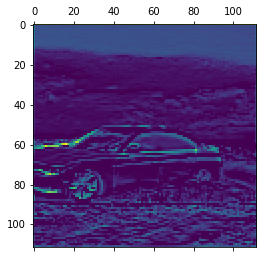

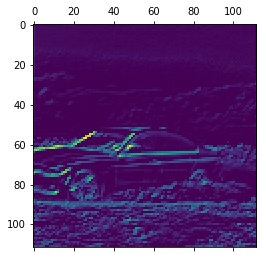

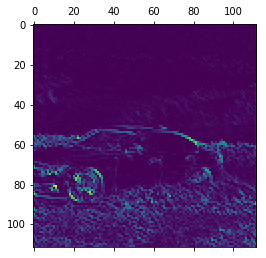

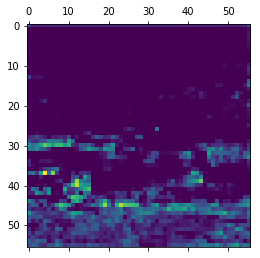

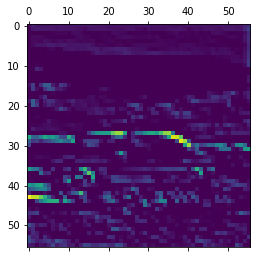

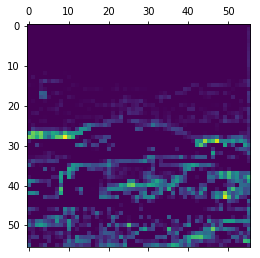

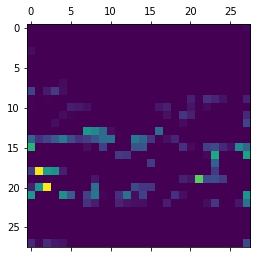

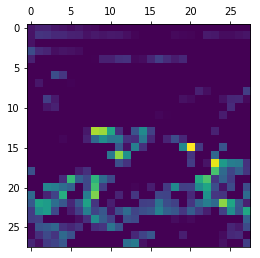

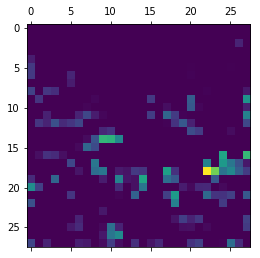

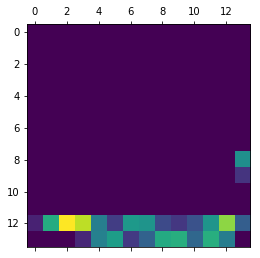

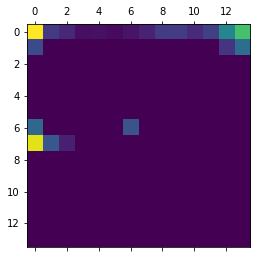

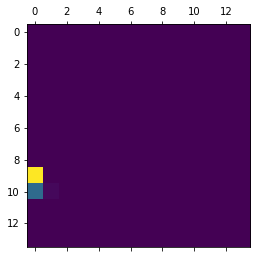

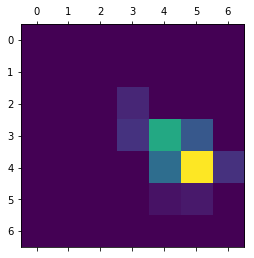

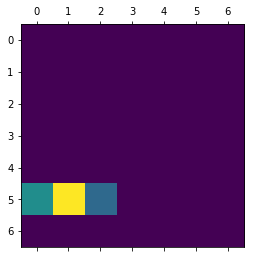

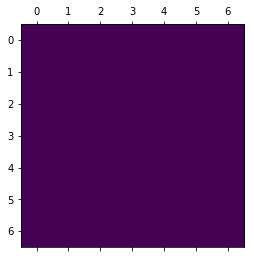

In [7]:
lvls = [5, 10, 17, 24, 31]
rs = np.random.RandomState(0)
for lvl in lvls:
    with torch.no_grad():
        ft = net.features[:lvl](x.unsqueeze(0))
    ft = ft[0].data.numpy()
    ind = rs.choice(ft.shape[0], 3)
    for idx in ind:
        plt.matshow(ft[idx])

In [8]:
print F.softmax(net(x.unsqueeze(0)), dim=1)[0].sort()[0][-10:]
print F.softmax(net(x.unsqueeze(0)), dim=1)[0].sort()[1][-10:]

tensor([0.0137, 0.0144, 0.0188, 0.0235, 0.0237, 0.0269, 0.0996, 0.2025, 0.2511,
        0.3060], grad_fn=<SliceBackward>)
tensor([609, 581, 672, 511, 751, 717, 817, 479, 436, 656])


In [9]:
for p in net.parameters():
    p.requires_grad = False

In [10]:
import torch.optim as optim

In [18]:
delta = 0.01 * torch.randn(x.size())
delta.requires_grad = True

In [ ]:
criterion = nn.CrossEntropyLoss()

# Todo: what is the id of the class that was predicted for our image ?
idx = None
optimizer = optim.SGD([delta], lr=0.01)

for _ in range(100):
    output = net((x + delta).unsqueeze(0))

    #TODO: compute the loss to backpropagate
    loss = None
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    #print "%.4e" % loss.item()
    
    print F.softmax(output)[0].sort()[0][-10:]
    print F.softmax(output)[0].sort()[1][-10:]
    
    # TODO: break the loop once we are satisfied 
    if ?:
        break

In [ ]:
x_np = (x * t_std + t_mean).detach().numpy()
x_np = np.transpose(x_np, [1, 2, 0])

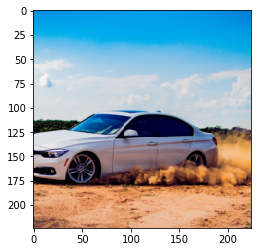

In [15]:
plt.imshow(x_np)

In [88]:
#TODO: show your perturbed image